Mu shape:  torch.Size([5])
Sigma shape:  torch.Size([5, 5])


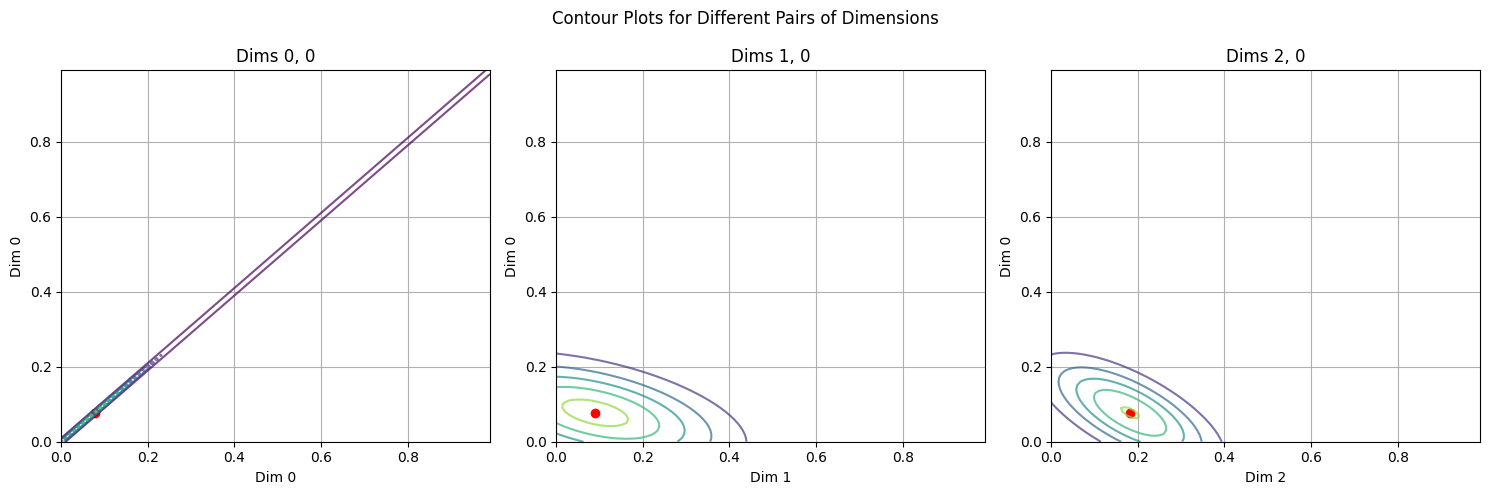

In [3]:
import torch

from vni.estimators.covariance import CovarianceEstimator

device = "cuda" if torch.cuda.is_available() else "cpu"

cov_est = CovarianceEstimator()

batch_size = 5
n_features = 5

# Assuming means and stds have the correct shapes
means = torch.randn((batch_size, n_features), device=device)  # example means
means = torch.clamp(means, min=0.0, max=0.1)

stds = torch.abs(
    torch.randn((batch_size, n_features), device=device)
)  # example stds (positive)
stds = torch.clamp(stds, min=0.0, max=0.2)
# Create the data with the desired size
data = torch.normal(means, stds)
# Clip the samples between start and stop
data = torch.clamp(data, min=0.0, max=1.0)

cov_est.set_data(data)

mu, sigma = cov_est.get_parameters()

print("Mu shape: ", mu.shape)
print("Sigma shape: ", sigma.shape)

pairs = [(0, 0), (1, 0), (2, 0)]
cov_est.plot_gaussian_contours_torch(mu, sigma, pairs)